### **Dataset:** 
Sentiment140 : discover the sentiment of a brand, product, or topic on Twitter.: http://help.sentiment140.com/for-students
    

### **Read data** 

#### Import librairies

In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from termcolor import colored

#### Load data

In [7]:
dataset.dtypes

4                                                                                                                   int64
3                                                                                                                   int64
Mon May 11 03:17:40 UTC 2009                                                                                       object
kindle2                                                                                                            object
tpryan                                                                                                             object
@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.    object
dtype: object

In [ ]:
import sqlite3
import csv

class csvrd(object):
    def csvFile(self):

        self.readFile('student_info.csv')

    def readFile(self, filename):
        conn = sqlite3.connect('TwitterDB.db')
        cur = conn.cursor() 
        #cur.execute('create table student(name varchar2(10), age int);')
        filename.encode('utf-8')
        #print ("test1")
        with open(filename) as f:
            reader = csv.reader(f)
            for field in reader:
                cur.execute("insert into student (name, age) VALUES (?, ?);", field)

        conn.commit()
        conn.close()

c = csvrd().csvFile()


In [3]:
import pandas as pd

import sqlite3

conn = sqlite3.connect('TwitterDB.db')
c = conn.cursor()
# load the data into a Pandas DataFrame
#users = pd.read_csv('sentiment140.csv')
# write the data to a sqlite table
#users.to_sql('users', conn, if_exists='append', index = False)


#cur.execute('create table datatwitter1(target int, id int, date text, flag text, user text, text text);')
#c.execute('''CREATE TABLE orders (order_id int, user_id int, item_name text)''')
datatwitter1 = pd.read_csv('sentiment140.csv',encoding='latin-1')
#datatwitter1.to_sql('datatwitter1', conn, if_exists='append', index = False) # write to sqlite table
    
datatwitter1.execute("insert into datatwitter1 (target, id, date, flag, user, text) VALUES (?, ?, ?, ?, ?, ?);",(field, ) )

conn.commit()
conn.close()



AttributeError: 'DataFrame' object has no attribute 'execute'

In [11]:
import sqlite3
import pandas as pd
# Create your connection.
cnx = sqlite3.connect('TwitterDB.db') # name of database qui store file sentiment140.csv

df = pd.read_sql_query("SELECT * FROM sentiment140", cnx) #sentiment140 is name of table qui store file sentiment140.csv

In [12]:
df.head()

,field1,field2,field3,field4,field5,field6
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#### Shape and information of dataset

This dataset has 6 columns and 1600000 tweets

In [13]:
df.shape

(1600000, 6)

In [14]:
df.info

<bound method DataFrame.info of          field1      field2                        field3    field4  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                  field5                                             field6  
0        _TheSpecialOne_  @switchfoot

Types of each columns

In [15]:
df.dtypes

field1     int64
field2     int64
field3    object
field4    object
field5    object
field6    object
dtype: object

In [18]:
df.iloc[:, 0].unique()

array([0, 4])

Although the description of dataset, we don't have tweets with target "2". So we can replace target from [0,4] by [0,1]

#### Plot data

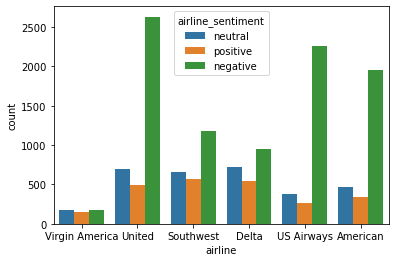

In [49]:
sns.countplot(data = dataset, x ="airline", hue = "airline_sentiment");

### **Data processing**

The values in the target data are categorical and are 'neutral', 'positive' & 'negative'. For the easy computation, we are replacing the 'neutral', 'positive' & 'negative' with 0, 1 & -1 values respectively.

In [81]:
dataset['airline_sentiment'].replace(('neutral', 'positive', 'negative'), (0, 1, -1), inplace=True)
dataset['airline_sentiment'].value_counts()

-1    9178
 0    3099
 1    2363
Name: airline_sentiment, dtype: int64

In [83]:
data_text = dataset['text']
data_text.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [85]:
data_target = dataset['airline_sentiment']
data_target.head()

0    0
1    1
2    0
3   -1
4   -1
Name: airline_sentiment, dtype: int64

In [75]:
from nltk.corpus import stopwords
STOPWORDS=stopwords.words('english')
STOPWORDS[:5]

['i', 'me', 'my', 'myself', 'we']

In [86]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data_text = data_text.apply(lambda text: cleaning_stopwords(text))
data_text.sample(5)

484      @VirginAmerica Grouping Virgin others now. BOS...
9485     @USAirways great operation guys running. More ...
6281     @SouthwestAir birthday February 24th date imag...
14576            @AmericanAir But Eagle always Late Flight
8963     @JetBlue CEO weighs profits, flyers - @Chronic...
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].sample(5)